# **Assignment 3 - Machine Learning**
Nick Milkin

In [1]:
# Some data-handling functions to download/import.

# from https://github.com/yandexdataschool/mlhep2018/blob/master/day2-Tue/seminar-03-keras-cnn/seminar_tf_keras.ipynb
"""I load some cifar"""

import numpy as np
from sklearn.model_selection import train_test_split
import os, sys
if sys.version_info[0] == 2:
    from urllib import urlretrieve
    import cPickle as pickle

else:
    from urllib.request import urlretrieve
    import pickle

def unpickle(file):
    fo = open(file, 'rb')
    if sys.version_info[0] == 2:
        dict = pickle.load(fo)
    else:
        dict = pickle.load(fo,encoding='latin1')
    
    fo.close()
    return dict




def download_cifar10(path,
                     url='https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
                     tarname='cifar-10-python.tar.gz',):
    import tarfile
    if not os.path.exists(path):
        os.mkdir(path)
    
        

    urlretrieve(url, os.path.join(path,tarname))
    tfile = tarfile.open(os.path.join(path,tarname))
    tfile.extractall(path=path)
    

def load_cifar10(data_path=".",channels_last=False,test_size=0.2,random_state=1337):
    
    test_path = os.path.join(data_path,"cifar-10-batches-py/test_batch")
    train_paths = [os.path.join(data_path,"cifar-10-batches-py/data_batch_%i"%i) for i in range(1,6)]
    
    if not os.path.exists(test_path) or not all(list(map(os.path.exists, train_paths))):
        print ("Dataset not found. Downloading...")
        download_cifar10(data_path)

    train_batches = list(map(unpickle,train_paths))
    test_batch = unpickle(test_path)

    X = np.concatenate([batch["data"] for batch in train_batches]).reshape([-1,3,32,32]).astype('float32')/255
    y = np.concatenate([batch["labels"] for batch in train_batches]).astype('int32')
    X_train,X_val,y_train,y_val = train_test_split(X,y,
                                                   test_size=test_size,
                                                   random_state=random_state)
    
    X_test = test_batch["data"].reshape([-1,3,32,32]).astype('float32')/255
    y_test = np.array(test_batch["labels"]).astype('int32')
    
    if channels_last:
        #convert from [batch,3,H,W] to [batch,H,W,3]
        #WARNING! Make this is only necessary for tensorflow-style dim order
        #If you use theano-style dimensions in keras config, skip this cell
        X_train = X_train.transpose([0,2,3,1])
        X_val   = X_val.transpose([0,2,3,1])
        X_test  = X_test.transpose([0,2,3,1])

    
    return X_train,y_train,X_val,y_val,X_test,y_test

In [2]:
import tensorflow as tf
#gpu_options = tf.GPUOptions(allow_growth=True, per_process_gpu_memory_fraction=0.1) # restricts GPU load for multi-user nodes

import tensorflow.keras as keras
from keras import backend as K
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
print(tf.__version__)
print(keras.__version__)

2.11.0
2.11.0


In [3]:
# Load the data samples

x_train,y_train,x_val,y_val,x_test,y_test = load_cifar10("cifar_data",channels_last=True)

NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]

print("Train samples:", x_train.shape, y_train.shape)
print("Test samples:", x_test.shape, y_test.shape)
print("Val samples:", x_val.shape, y_val.shape)

Dataset not found. Downloading...
Train samples: (40000, 32, 32, 3) (40000,)
Test samples: (10000, 32, 32, 3) (10000,)
Val samples: (10000, 32, 32, 3) (10000,)


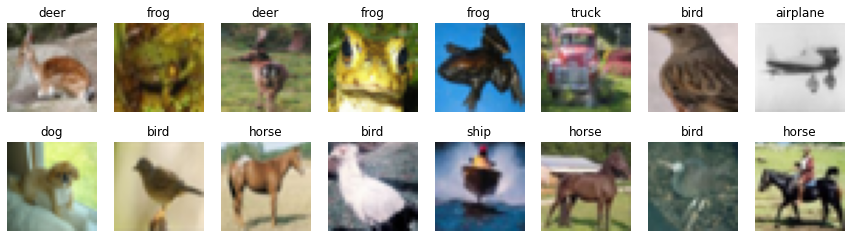

In [4]:
# show some random images from train, and their labels

cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_train[random_index, :])
        ax.set_title(cifar10_classes[y_train[random_index]])
plt.show()

In [5]:
# normalize inputs
# convert class labels to one-hot encoded, should have shape (?, NUM_CLASSES)
# x_train = x_train.astype(np.float64) - 0.5

y_train = keras.utils.to_categorical(y_train, num_classes=10)

y_val = keras.utils.to_categorical(y_val, num_classes=10)

y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [6]:
# import necessary building blocks
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization, RandomFlip, RandomContrast, RandomRotation, RandomZoom, LeakyReLU
# produces an import error:
# from keras.layers.advanced_activations import LeakyReLU

In [72]:
def make_model():
    """
    Define your model architecture here.
    Returns `Sequential` model.
    """

    model = Sequential()

    ### STUDENT CODE HERE ###
    ### --> Build your convolutional neural network. 
    ### First, make a CNN layer with some small kernels to learn some basic features, with Conv2D.
    ### Then, add a Pooling layer to pick up the relevant kernels.
    ### Then, Flatten it and add some fully-connected (Dense) normal NN layers,
    ###  to learn the relevant combinations of low-level kernel features.
    ### Finally, some regularisation is advised, using a Dropout layer, to avoid local minima.
    ### Make sure the output is of the same shape as the number of labels we have,
    ### And the input is the same as the figures (which now have a 3rd dimension - color!)
    ### Again, use google to find information on these classes.

    # Data augmentation is modifying the input data to increase the training
    # dataset. For images it can be changing contrast, cropping, slight rotations,
    # zooming, etc. However, in my tests data augmentation did not increase the score
    # significantly but increased the training time tremendously

    # model.add(RandomFlip('horizontal'))
    # model.add(RandomZoom(height_factor=(0, 0.2)))
    # model.add(RandomContrast(0.5))
    # model.add(RandomRotation(factor=(-0.2, 0.2), fill_mode='reflect'))

    # Convolutional layers: layers that use kernel. 3x3 size is considered 
    # sufficient for small images, leakyReLU activation is a regular ReLU but
    # with a slight gradient before the 0. Padding determines how the kernel 
    # behaves on the border of the image.

    model.add(Conv2D(filters=64, input_shape=[32, 32, 3], kernel_size=3, activation="LeakyReLU", padding='same'))
    model.add(MaxPooling2D())
    model.add(Conv2D(filters=128, kernel_size=3, activation="LeakyReLU", padding='same'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=128, kernel_size=3, activation="LeakyReLU", padding='same'))
    model.add(MaxPooling2D())
    # model.add(Dropout(0.3))
    # model.add(BatchNormalization())
    model.add(Flatten())

    # Dense layers are used to actually classify the output of the convolutional
    # layers from processing of the images

    model.add(Dense(64, activation='LeakyReLU'))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='sigmoid'))
    # model.add(Dropout(0.3))
    # model.add(BatchNormalization())
    model.add(Dense(NUM_CLASSES, activation='softmax'))

    ### END STUDENT CODE ### 

    # Ensure normalized probabilities over the 10 classes
    model.add(Activation("softmax")) 

    return model

In [68]:
### STUDENT CODE HERE ###
### --> change the parameters below to perform a better training

INIT_LR = 0.01  # initial learning rate
BATCH_SIZE = 256
EPOCHS = 100    # more than needed to allow for early stopping

# Adding Early Stopping
# We consider an improvement of 0.001 a minimal improvment
# If no larger than 0.001 improvment occurs after 10 epochs, we stop and restore best weights
# Early stopping allows to train the model exatly up to a point where it 
# starts overfitting the training data. Validation data accuracy is always
# compared while training, and when it does not increase it means that
# further training would result in overfitting, so the training stops early.

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, 
    patience=10, 
    restore_best_weights=True,
)

K.clear_session()  # clear default graph
# don't call K.set_learning_phase() !!! (otherwise will enable dropout in train/test simultaneously)
model = make_model()  # define our model

# prepare model for fitting (loss, optimizer, etc)
model.compile(
    loss='categorical_crossentropy',  # we train 10-way classification
    optimizer='adam',  # for SGD.
    metrics=['accuracy']  # report accuracy during training
)

# fit model
model.fit(
    x_train, y_train,  # prepared data
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_val, y_val),
    shuffle=True,
    callbacks=[early_stopping] # use early stopping
)

# save weights to file to avoid re-training
model.save_weights("weights.h5")

Epoch 1/100
157/157 [==============================] - 7s 30ms/step - loss: 2.1331 - accuracy: 0.3604 - val_loss: 2.2171 - val_accuracy: 0.3457
Epoch 2/100
157/157 [==============================] - 5s 30ms/step - loss: 1.9778 - accuracy: 0.5031 - val_loss: 2.0768 - val_accuracy: 0.4009
Epoch 3/100
157/157 [==============================] - 5s 29ms/step - loss: 1.9350 - accuracy: 0.5349 - val_loss: 1.9444 - val_accuracy: 0.5289
Epoch 4/100
157/157 [==============================] - 4s 28ms/step - loss: 1.9130 - accuracy: 0.5534 - val_loss: 1.9324 - val_accuracy: 0.5291
Epoch 5/100
157/157 [==============================] - 4s 27ms/step - loss: 1.8905 - accuracy: 0.5764 - val_loss: 1.9334 - val_accuracy: 0.5322
Epoch 6/100
157/157 [==============================] - 5s 29ms/step - loss: 1.8612 - accuracy: 0.6112 - val_loss: 1.9024 - val_accuracy: 0.5709
Epoch 7/100
157/157 [==============================] - 4s 28ms/step - loss: 1.8035 - accuracy: 0.6730 - val_loss: 1.9177 - val_accuracy:

In [69]:
# load weights from file (can call without model.fit)
model.load_weights("weights.h5")

313/313 [==============================] - 1s 2ms/step


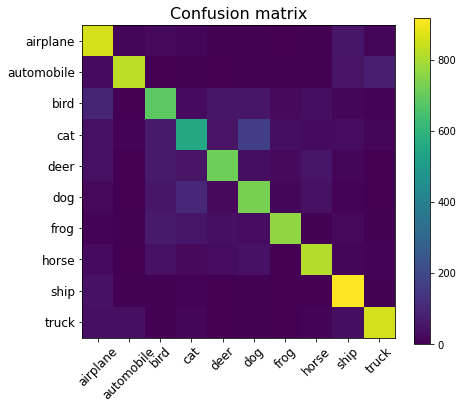

Test accuracy: 0.7727


In [70]:
# make test predictions
y_pred_test = model.predict(x_test)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)
y_test_index = [list(onehot).index(1) for onehot in y_test]

# confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test_index, y_pred_test_classes))
plt.xticks(np.arange(10), cifar10_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), cifar10_classes, fontsize=12)
plt.colorbar()
plt.show()
print("Test accuracy:", accuracy_score(y_test_index, y_pred_test_classes))

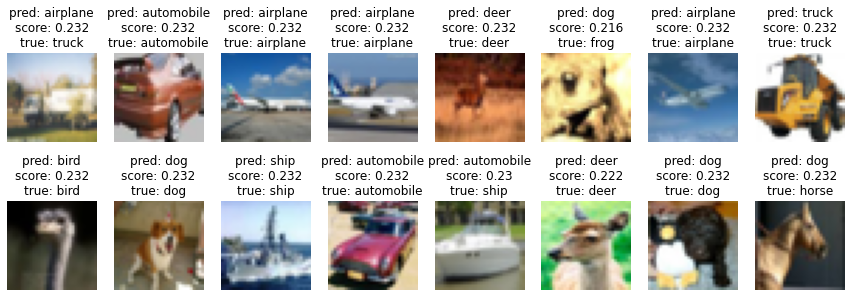

In [28]:
# inspect preditions
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_test[random_index, :])
        pred_label = cifar10_classes[y_pred_test_classes[random_index]]
        pred_proba = y_pred_test_max_probas[random_index]
        true_label = cifar10_classes[y_test_index[random_index]]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))
plt.show()

# Iteration path
1) Created a simple network as instructed with one Conv2D layer, Pooling, Flatten and a couple of Dense layers. Trained for 10 epochs. Result: 0.235 accuracy.

2) Tried training the network for 30 epochs. Got an accuracy increase to 0.358 

3) Specified ReLU activation in the Conv2D layer, inreased number of neurons in one Dense layer to 64. Got an accuracy of 0.5645

4) Changed optimized to 'adam' and added an additional Conv2D layer and pooling. Accuracy increased to 0.6634

5) Added another Conv2D layer and another Dense layer with sigmoid activation, specified padding='same' in convolutional layers for the kernels. Slight increase in accuracy to 0.708

6) Added early stopping to prevent overfitting. Increased the max number of epochs to 100 so that early stopping can actually work. The training ran for 43 epochs. No significant change in accuracy.

7) Added one layer of dropout of 0.3 neurons in one of the dense layers and batch normalization. Accuracy increase to 0.728

8) Added more Droupout and BatchNormalization layers. Accuracy increased to 0.745

9) Added data augmentation as a preprocessing layer in the model (random mirroring around y-axis). Decrease in accuracy to 0.74. Significant increase in running time with any other preprocessing and especially in combination.

10) Changed relu activations to LeakyReLU and removed some possibly excessive dropout layers. Accuracy increased to 0.767

11) FINAL: changed activation in the prefinal layer to signoid. Got an accuracy of 0.773 


# Some tips on how to improve:

* The ultimate quest is to create a network that has as high __accuracy__ as you can push it.

## Potential grading:
* starting at zero points
* +2 for describing your iteration path in a report below.
* +2 for building a network that gets above 20% accuracy
* +1 for beating each of these milestones on __TEST__ dataset:
    * 50% (5 total)
    * 60% (6 total)
    * 65% (7 total)
    * 70% (8 total)
    * 75% (9 total)
    * 80% (10 total)

## Bonus points
Common ways to get bonus points are:
* Get higher score, obviously.
* Anything special about your NN. For example \"A super-small/fast NN that gets 80%\" gets a bonus.
* Any detailed analysis of the results. (saliency maps, whatever)


## Tips on what can be done:

 * __Network size__
   * More neurons, 
   * More layers, ([lasagne docs](http://lasagne.readthedocs.org))
   * Nonlinearities in the hidden layers
   * tanh, relu, leaky relu, etc
   * Larger networks may take more epochs to train, so don't discard your net just because it could didn't beat the baseline in 5 epochs.

 * __Convolution layers__
   * they __are a must__ unless you have any super-ideas
   * `network = lasagne.layers.Conv2DLayer(prev_layer,`
     `                       num_filters = n_neurons,`
     `                       filter_size = (filter width, filter height),`
     `                       nonlinearity = some_nonlinearity)`
   * Warning! Training convolutional networks can take long without GPU. That's okay.
     * If you are CPU-only, we still recomment to try a simple convolutional architecture
     * a perfect option is if you can set it up to run at nighttime and check it up at the morning.
     * Make reasonable layer size estimates. A 128-neuron first convolution is likely an overkill.
     * __To reduce computation__ time by a factor in exchange for some accuracy drop, try using __stride__ parameter. A stride=2 convolution should take roughly 1/4 of the default (stride=1) one.

   * Plenty other layers and architectures
     * http://lasagne.readthedocs.org/en/latest/modules/layers.html
     * batch normalization, pooling, etc


 * __Early Stopping__
   * Training for 100 epochs regardless of anything is probably a bad idea.
   * Some networks converge over 5 epochs, others - over 500.
   * Way to go: stop when validation score is 10 iterations past maximum


 * __Faster optimization__ - 
   * rmsprop, nesterov_momentum, adam, adagrad and so on.
     * Converge faster and sometimes reach better optima
     * It might make sense to tweak learning rate/momentum, other learning parameters, batch size and number of epochs
   * __BatchNormalization__ (lasagne.layers.batch_norm) FTW!


 * __Regularize__ to prevent overfitting
   * Add some L2 weight norm to the loss function, theano will do the rest
     * Can be done manually or via - http://lasagne.readthedocs.org/en/latest/modules/regularization.html
   * Dropout - to prevent overfitting
     * `lasagne.layers.DropoutLayer(prev_layer, p=probability_to_zero_out)`   
     * Don't overdo it. Check if it actually makes your network better


 * __Data augmentation__ - getting 5x as large dataset for free is a great deal
   * Zoom-in+slice = move
   * Rotate+zoom(to remove black stripes)
   * any other perturbations
   * Add Noize (easiest: GaussianNoizeLayer)
   * Simple way to do that (if you have PIL/Image): 
     * ```from scipy.misc import imrotate,imresize```
     * and a few slicing
   * Stay realistic. There's usually no point in flipping dogs upside down as that is not the way you usually see them.


